In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
%matplotlib inline

/Users/sunny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'%matplotlib inline' is a 'Magic' command to get the plots inline with the notebook.

### Loading the Dataset from Keras

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Visualising the Data 

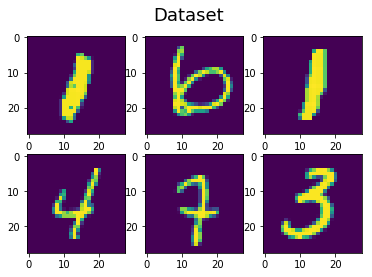

In [3]:
np.random.seed(3)
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows,ncols=n_cols)
fig.suptitle("Dataset", size=18)
for i in range(n_rows):
    for j in range(n_cols):
        ax[i][j].imshow(x_train[np.random.randint(0,6000)])

### Preprocessing the Data:

Preprocessing includes scaling the data to [-1,1] and getting zero mean. Also, as the Conv2D requires number of channels as a dimension, we reshaped the dataset to include the one and only grayscal channel.

In [4]:
def preprocess(dataset):
    dataset = (dataset - np.mean(dataset))/255
    dataset = dataset.reshape(-1,28,28,1)
    return dataset
x_train = preprocess(x_train)
x_test = preprocess(x_test)

### 'One-hot'-ing the Labels

One-hot vectors are used for multiclass classification. In one-hot vectors, only one bit would be set which corresponds to the correct category it belongs to. Rest are zero. Although here, an inbuilt function to_categorical from keras.utils can be used.

In [5]:
def onehot(labels):
    return np.array([[float(i==data) for i in range(10)] for data in labels])
y_train = onehot(y_train)
y_test = onehot(y_test)

### Defining the Model and its Architecture:

The Model defined is a very simple one with two Convolutional Layers and two Dense layers. Dropout layers were used for regularization. Since there are 10 labels (0 to 9), the last layer has 10 output nodes. Softmax activation gives us the probabilities directly.

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

In [7]:
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

Let us now see what our model looks like. Keras has a very simple method called summary() that outputs the layers, their shapes and the number of parameters in it.

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               401664    
__________

### Compiling the Model and Training:

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.1973 - acc: 0.9414 - val_loss: 0.0481 - val_acc: 0.9842
Epoch 2/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0557 - acc: 0.9830 - val_loss: 0.0323 - val_acc: 0.9890
Epoch 3/5
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0402 - acc: 0.9871 - val_loss: 0.0392 - val_acc: 0.9874
Epoch 4/5
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0320 - acc: 0.9895 - val_loss: 0.0251 - val_acc: 0.9911
Epoch 5/5
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0231 - val_acc: 0.9919


### Using the Model on a test dataset and Calculating the Accuracy:

In [11]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 6s 636us/step


[0.02312749295537651, 0.9919]

### Visualising Predictions

[]

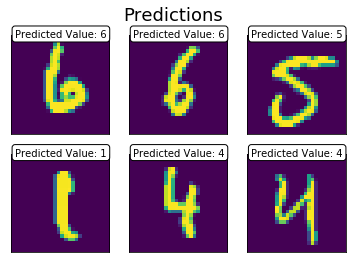

In [12]:
np.random.seed(3)
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows,ncols=n_cols)
fig.suptitle("Predictions", size=18)
ec = (0, 0, 0)
fc = (1, 1, 1)
for i in range(n_rows):
    for j in range(n_cols):
        k = np.random.randint(0,6000)
        ax[i][j].imshow(x_test[k].reshape((28,28)))
        temp = np.argmax(model.predict(np.expand_dims(x_test[k], axis=0)))
        ax[i][j].text(s="Predicted Value: {}".format(temp), x=0.75, y=0,
                      bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])